In [69]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns  


In [70]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


<AxesSubplot:>

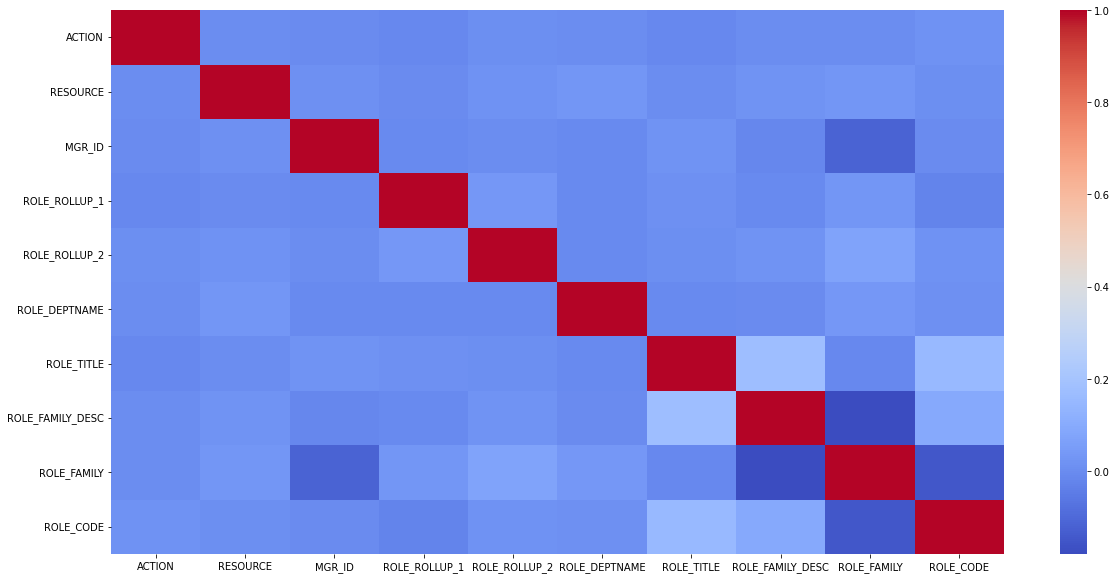

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap="coolwarm")

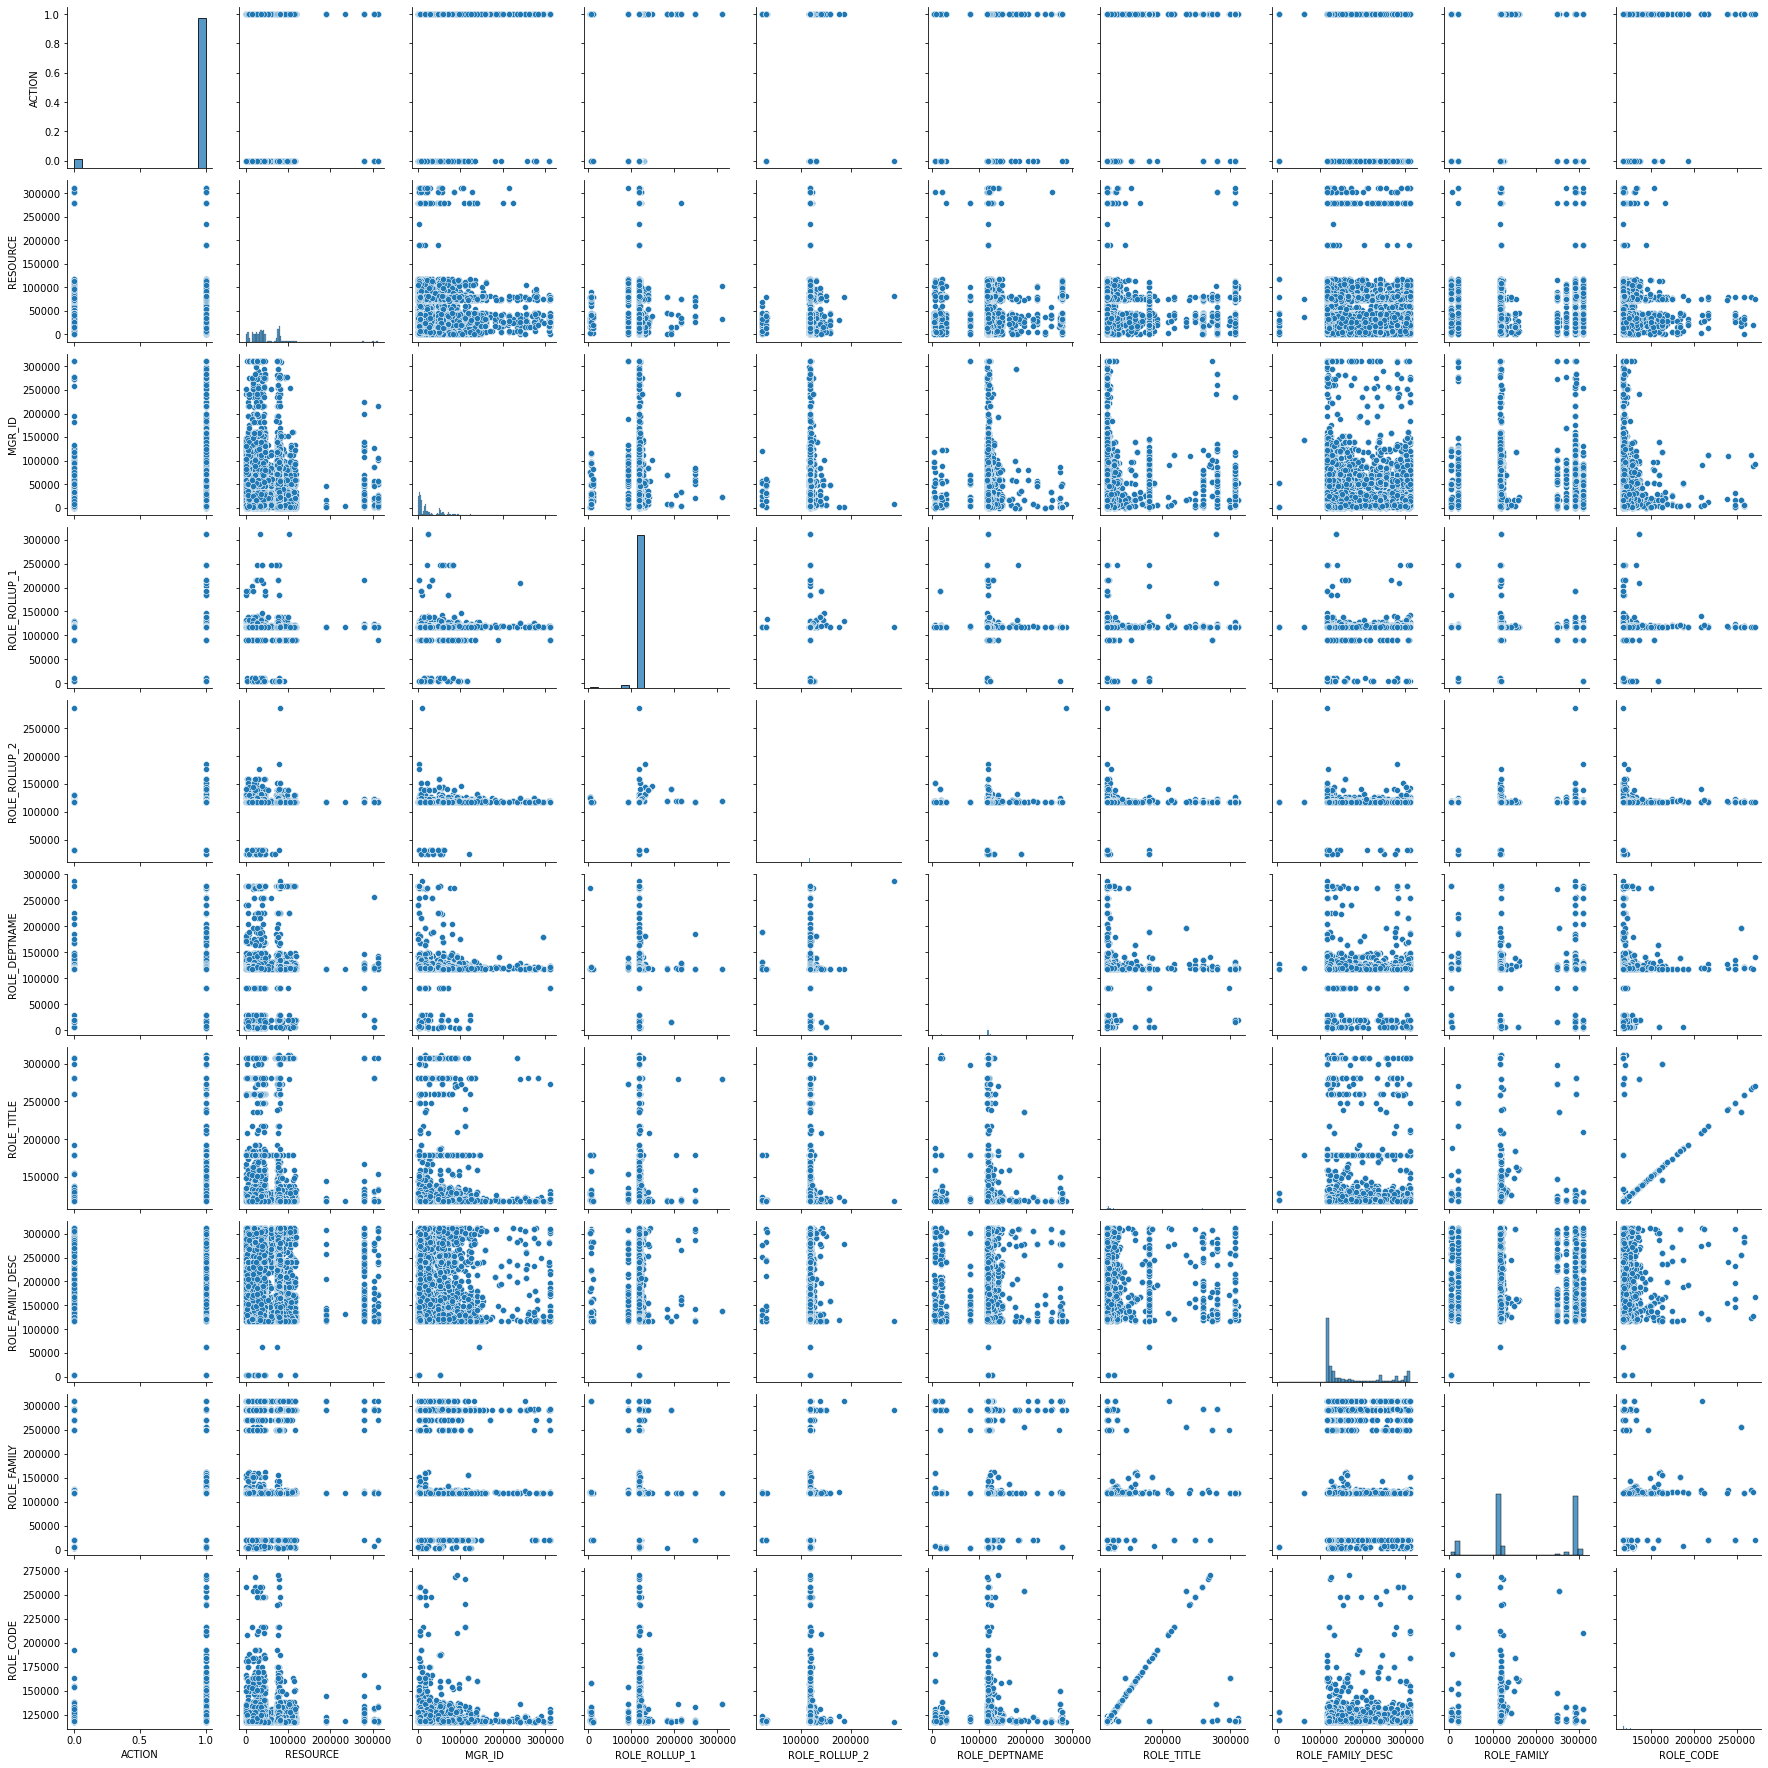

In [72]:
sns.pairplot(train)

/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

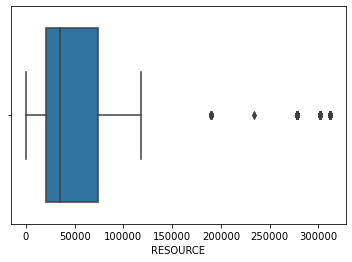

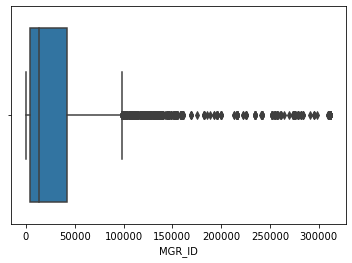

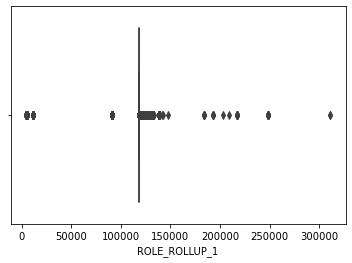

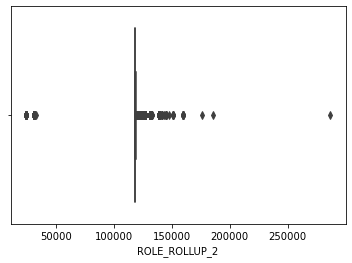

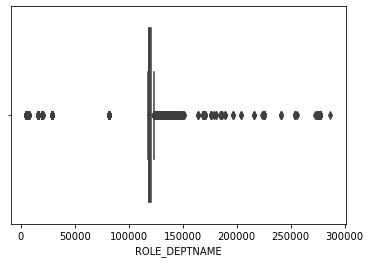

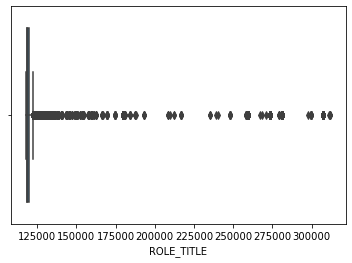

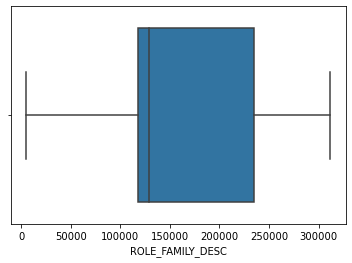

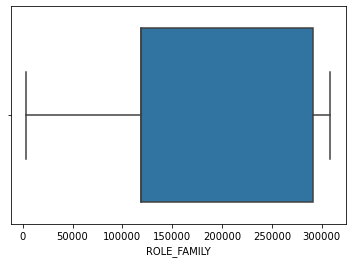

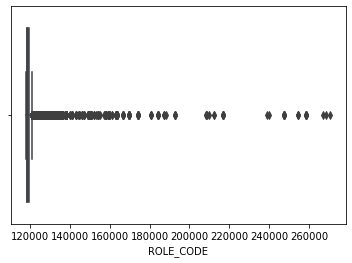

In [73]:
fea= train.drop(['ACTION'], axis=1, inplace=False)

for col in fea.columns:
    plt.figure()
    sns.boxplot(train[col])

/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<Figure size 432x288 with 0 Axes>

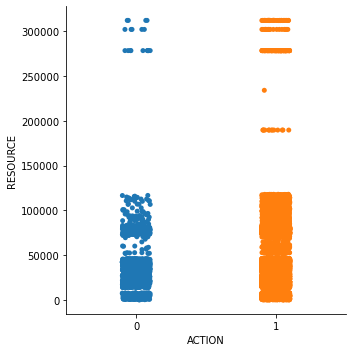

<Figure size 432x288 with 0 Axes>

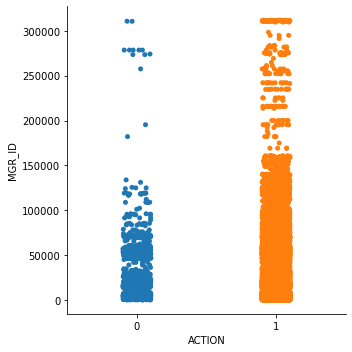

<Figure size 432x288 with 0 Axes>

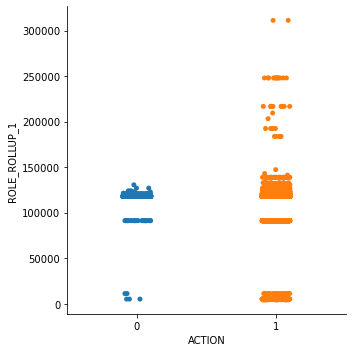

<Figure size 432x288 with 0 Axes>

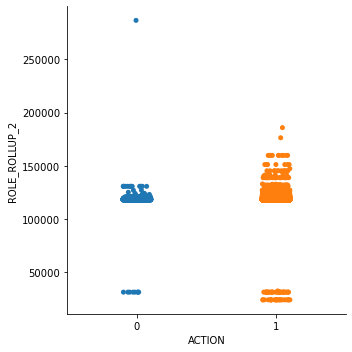

<Figure size 432x288 with 0 Axes>

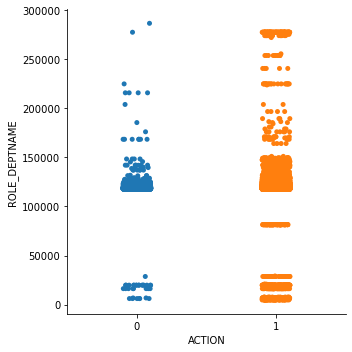

<Figure size 432x288 with 0 Axes>

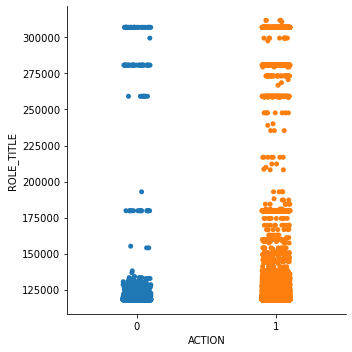

<Figure size 432x288 with 0 Axes>

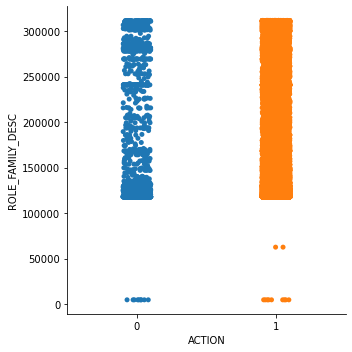

<Figure size 432x288 with 0 Axes>

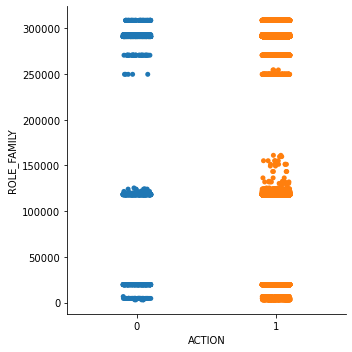

<Figure size 432x288 with 0 Axes>

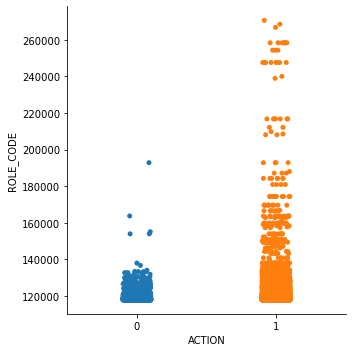

In [74]:
for col in fea.columns:
    plt.figure()
    sns.catplot('ACTION',col,data=train)

In [75]:
y_train=train["ACTION"]
x_train=train.drop(['ACTION','RESOURCE',"ROLE_CODE"], axis=1, inplace=False)
ids = test['id']
test.drop(['id','RESOURCE','ROLE_CODE'], axis=1, inplace=True)

In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [77]:
y_pred = classifier.predict(test)

In [78]:
output = pd.DataFrame({'Id': ids,
                       'Action':y_pred})
output.to_csv('submission.csv', index=False)